# Part I - (Shopping trends)
## by (faten Almanjali)

## Introduction

The dataset on Customer Shopping Preferences provides valuable insights into consumer behavior and buying habits. It's essential for businesses to comprehend customer preferences and trends, enabling them to customize products, refine marketing strategies, and improve the overall customer experience. This dataset encompasses diverse customer attributes such as age, gender, purchase history, preferred payment methods, and purchase frequency. By analyzing this data, businesses can make informed decisions, optimize their product offerings, and elevate customer satisfaction

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


In [2]:
Shopping = pd.read_csv('shopping_trends.csv')
Shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [3]:
Shopping.shape 

(3900, 18)

In [4]:
 # check for duplicated values
Shopping.duplicated().sum()

0

In [5]:
 # check for null values
Shopping.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

### What is the structure of your dataset?

> My dateset shows all info that helps compnay to data-driven decision making  in retails sector with 18 column rich data 3900

### What is/are the main feature(s) of interest in your dataset?

> By analyzing this data, businesses can make informed decisions, optimize their product offerings, and elevate customer satisfaction.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Season ,Subscription Status , Frequency of Purchases , Review Rating , will this data help to know customer preferences during the four seasons? What are the most frequently purchased items, and even the type of customer, whether he is registered or not, will help encourage them to subscribe and get a special discount?

### Questions to be asked about the data set:

1- Which season has the highest purchasing?<br>
2- Which most Category sales ? <br>
2- What are the most Season that have sales?<br>
3- Which cities are the highest sales city?<br>
4- Type of Subscription Status<br>

## Univariate Exploration


In [6]:
Shopping.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1526,1527,41,Male,Jacket,Outerwear,22,Oklahoma,L,White,Summer,3.1,No,Next Day Air,Yes,Yes,27,PayPal,Monthly
2133,2134,21,Male,Hat,Accessories,34,Maine,M,Olive,Summer,3.8,No,Standard,No,No,13,Bank Transfer,Annually
2855,2856,29,Female,Boots,Footwear,95,Mississippi,S,Maroon,Winter,3.8,No,2-Day Shipping,No,No,33,PayPal,Quarterly
1190,1191,62,Male,Shirt,Clothing,45,South Carolina,M,Orange,Winter,4.3,No,Next Day Air,Yes,Yes,31,Credit Card,Weekly
1404,1405,36,Male,Jewelry,Accessories,28,New Mexico,M,Charcoal,Winter,3.5,No,Next Day Air,Yes,Yes,10,Debit Card,Weekly


### This is will give us insight about which season have most sales ovar year 

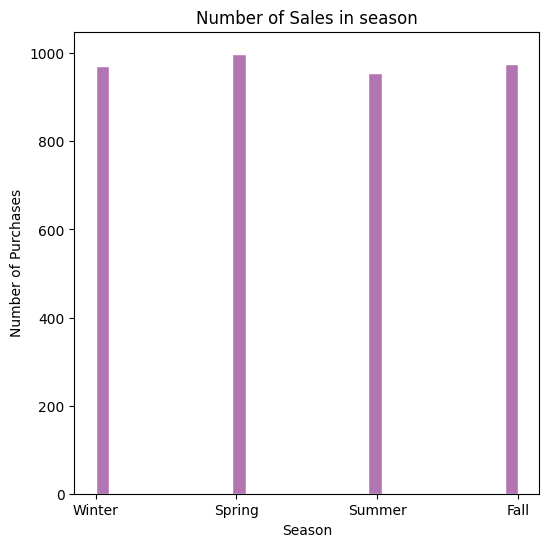

In [7]:
##Which season has the highest purchasing?
plt.figure(figsize = (6,6))
plt.hist(data = Shopping, x = 'Season' , bins = 31 , edgecolor = 'white', color = (0.5,0.1,0.5,0.6))
plt.title('Number of Sales in season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases');

### This is will give us insight about which Catgory are most sales

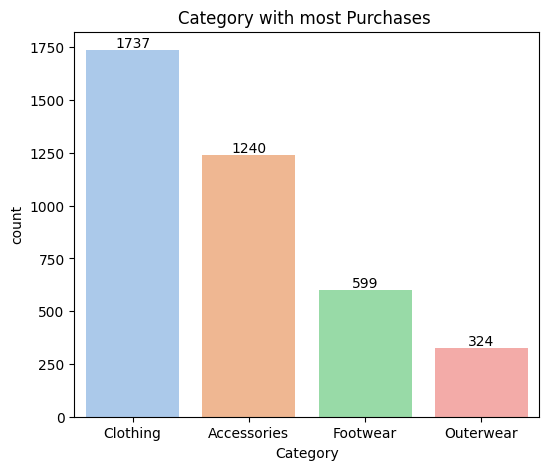

In [8]:
#Which most Category sales ? 
plt.figure(figsize=(6, 5))
highest_Category = Shopping['Category'].value_counts().index
ax = sns.countplot(data=Shopping, x='Category', order=highest_Category , palette= 'pastel')
plt.title('Category with most Purchases ')
plt.xlabel('Category')
for label in ax.containers:
    ax.bar_label(label)

### This is will give us insight about Top three city with higth sales ?

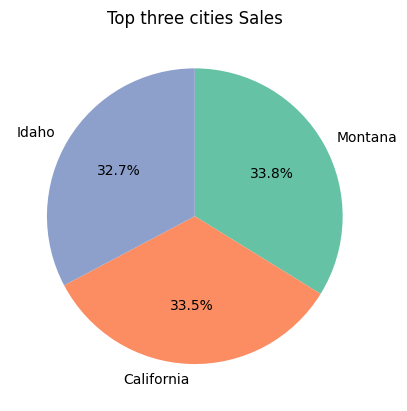

In [9]:
sorted_counts = Shopping['Location'].value_counts()[0:3]
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,autopct='%1.1f%%', counterclock = False,colors=sns.color_palette('Set2'))
plt.title('Top three cities Sales');

### This is will give us insight about status of our customer if they have a Subscription or not 

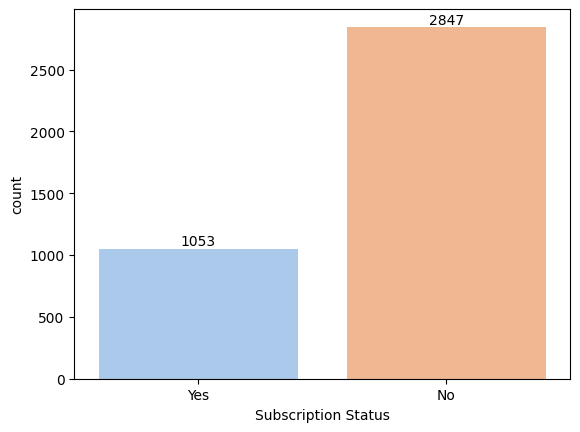

In [10]:
# Type of Subscription Status
ax = sns.countplot(x ='Subscription Status', data = Shopping ,palette= 'pastel')
for label in ax.containers:
    ax.bar_label(label)

## Bivariate Exploration

### What are the Age distribution in customer areas

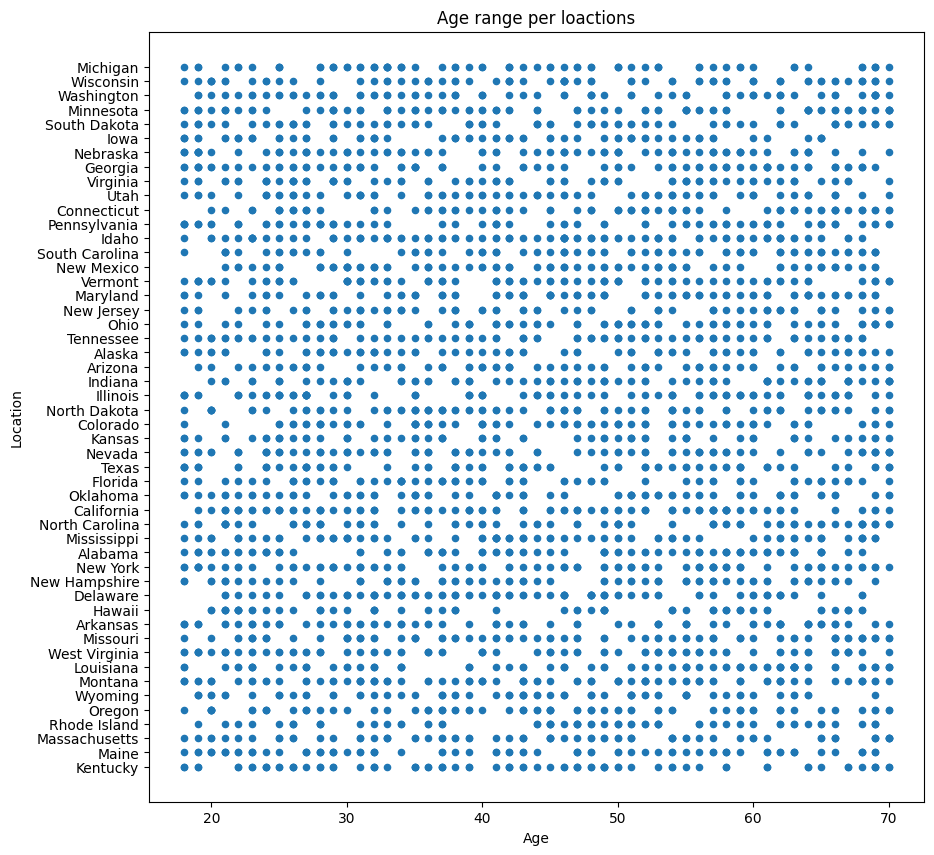

In [11]:
#Age distribution in customer areas?
Shopping.plot(x='Age', y='Location', kind='scatter', title = 'Age range per loactions',figsize=(10, 10));

### What are the Ageing of Frequency of Purchases 

<Axes: xlabel='Frequency of Purchases', ylabel='Age'>

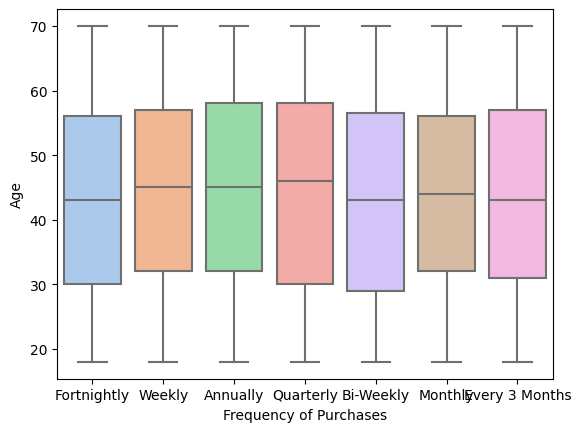

In [12]:
#What are the Ageing of Frequency of Purchases 
sns.boxplot(data=Shopping, x="Frequency of Purchases", y="Age" , palette= 'pastel')

### What are the Ageing range 

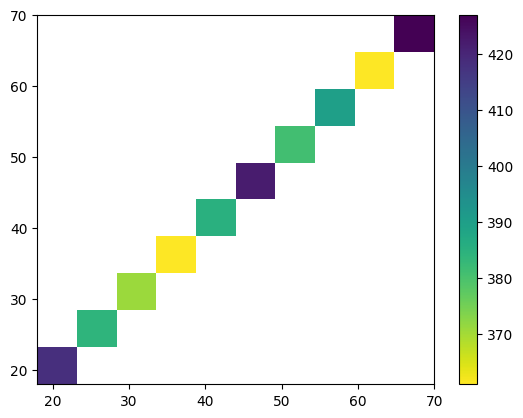

In [13]:
plt.hist2d(data=Shopping, x='Age', y='Age', cmin=0.5, cmap='viridis_r')
plt.colorbar()

## Multivariate Exploration

### plotting facet will give us view about Customers care in all Location by checking Review Rating in Season


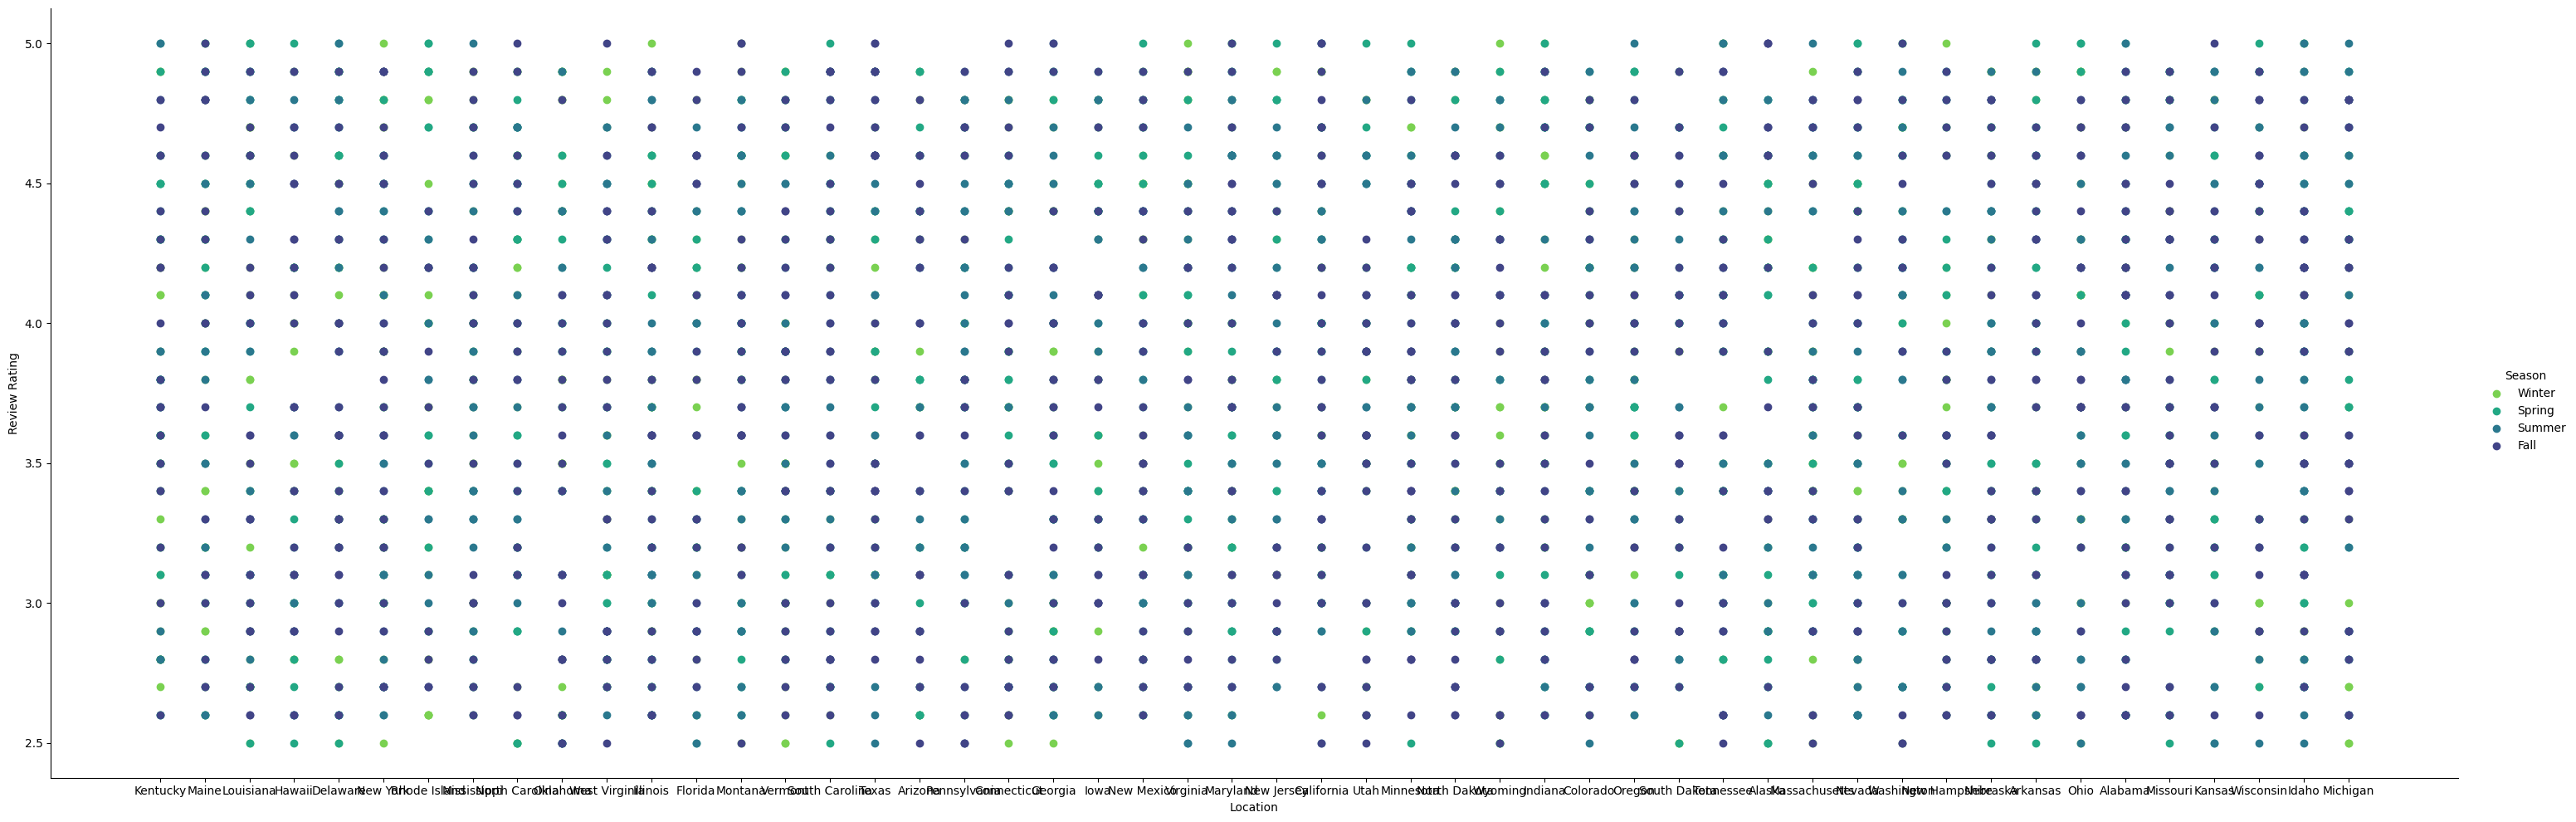

In [14]:
# plotting facet will give us view about Customers care in all Location by checking Review Rating in Season
g = sns.FacetGrid(data = Shopping, hue = 'Season', palette = 'viridis_r', height=10, aspect= 3)
g.map(plt.scatter, 'Location', 'Review Rating')
g.add_legend();

### plotting facet to see most Shipping Type per loacation and Season

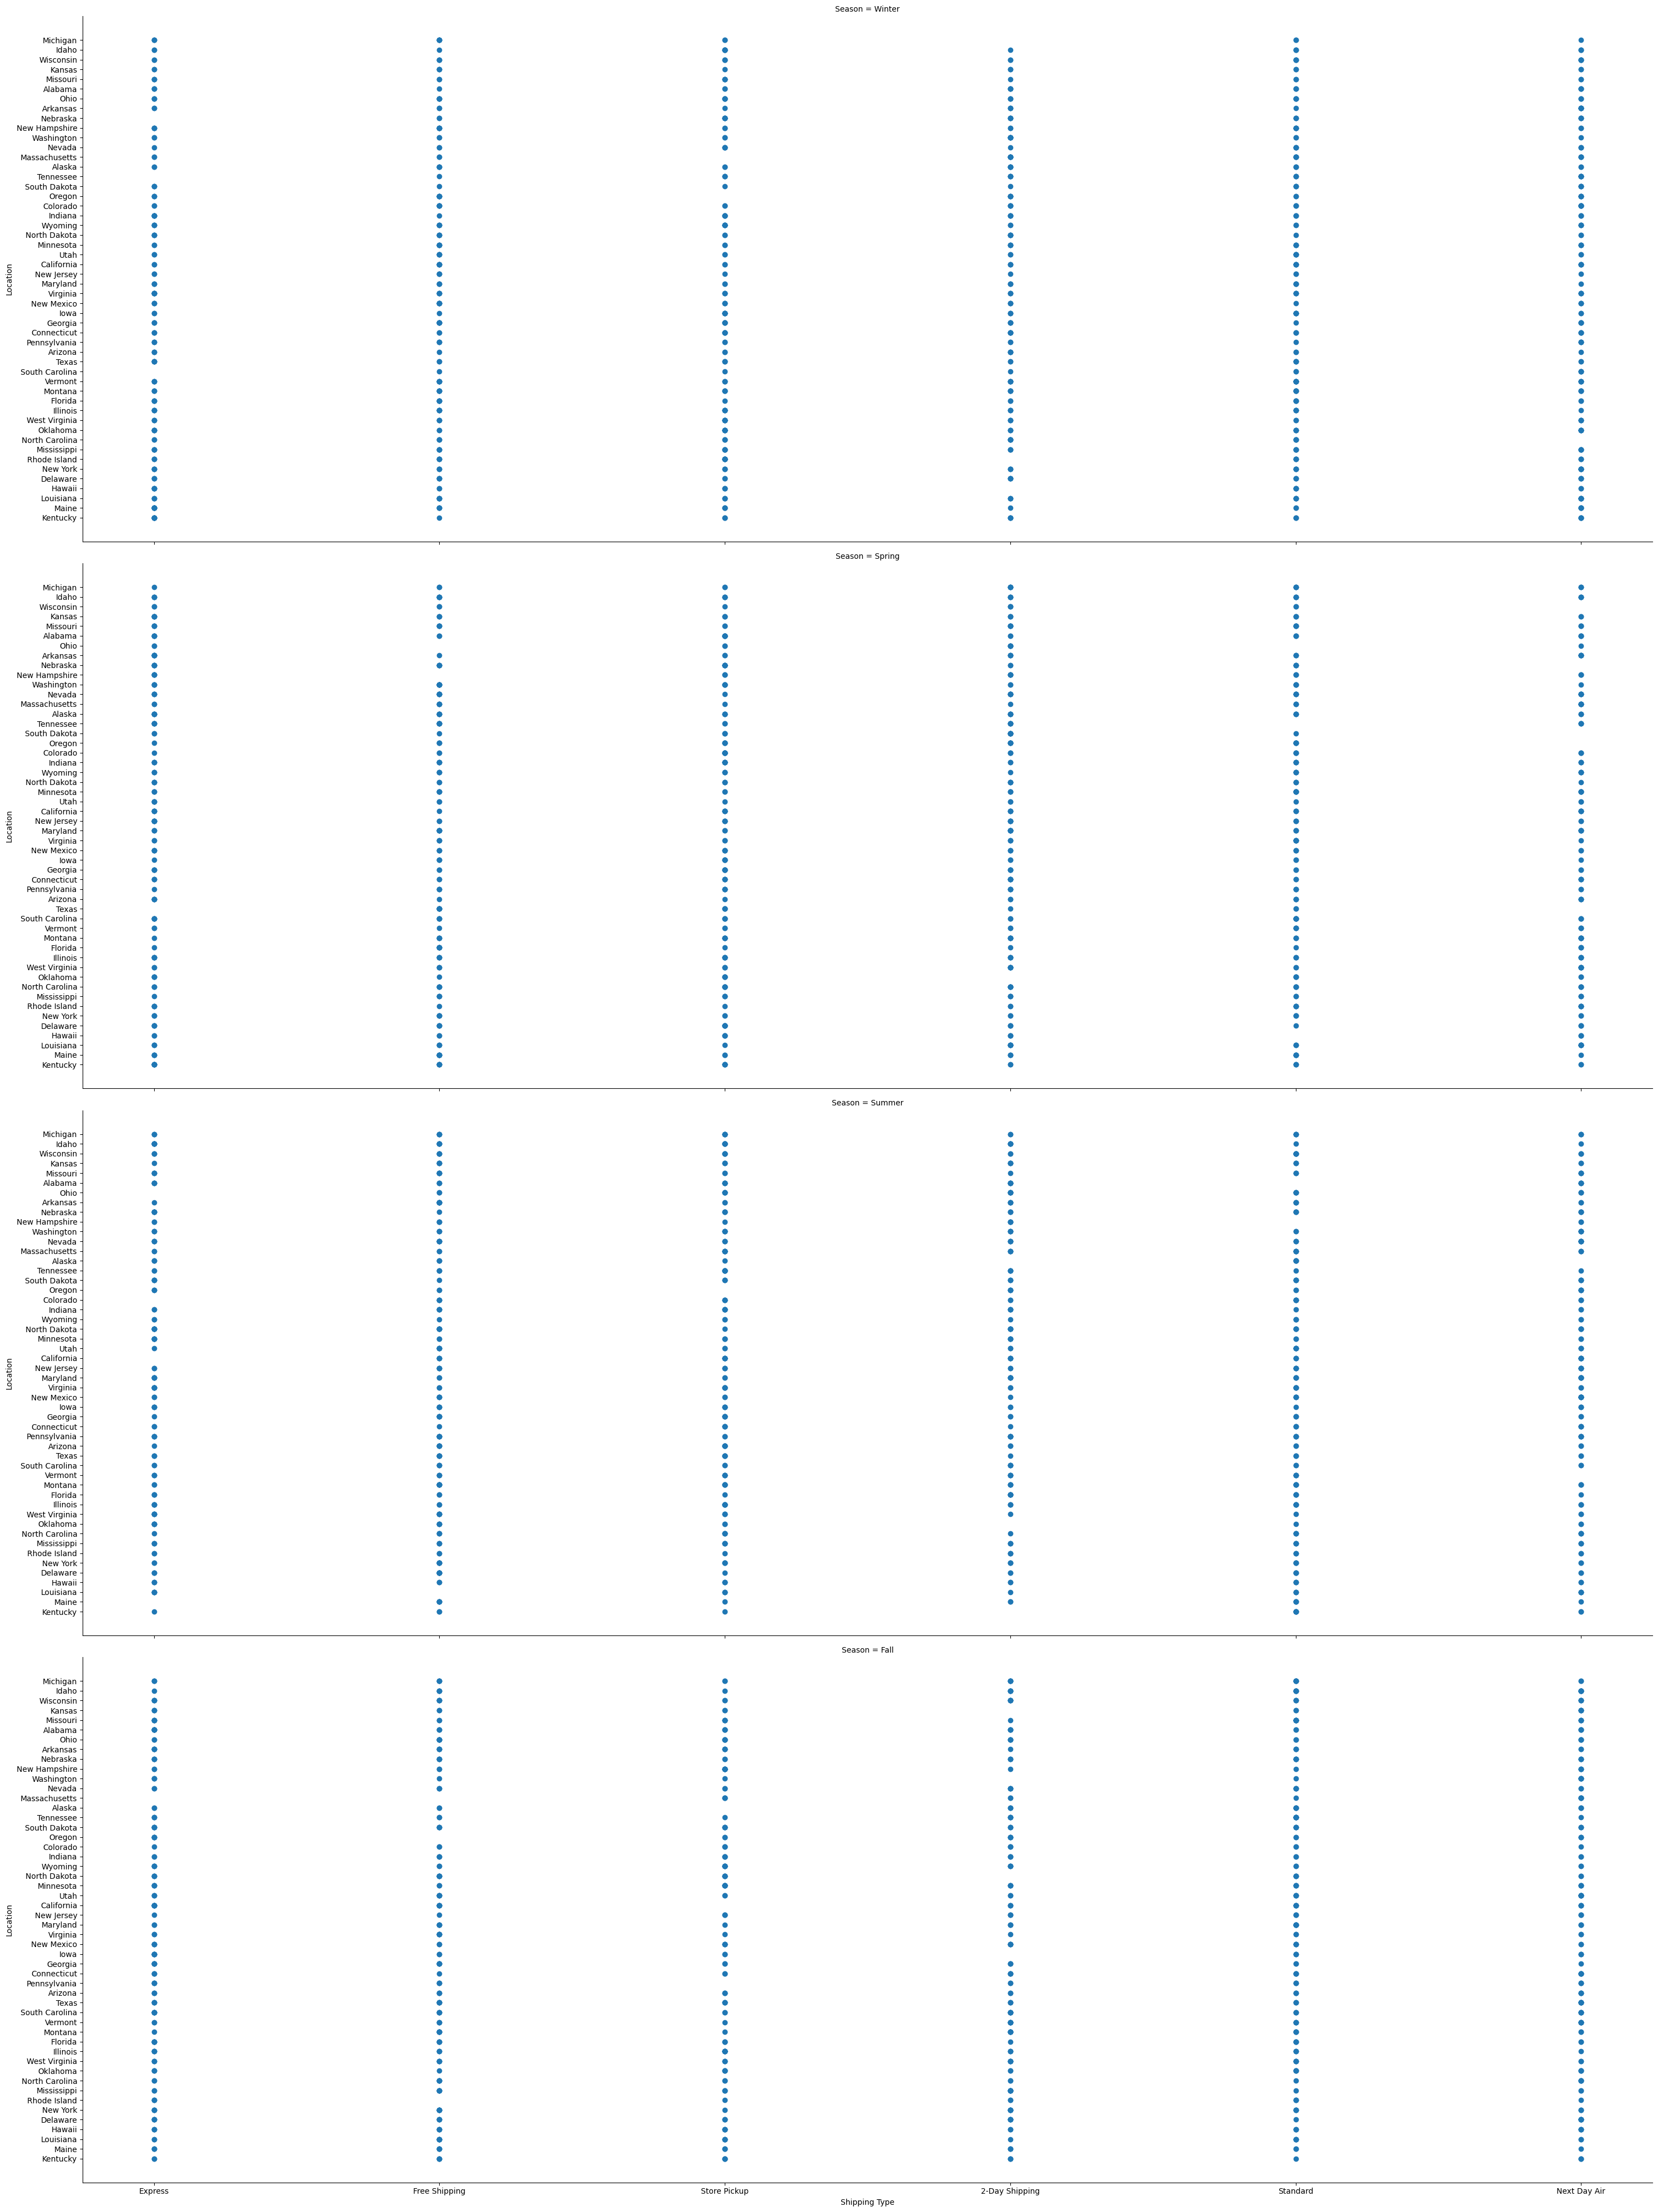

In [15]:
# plotting facet to see most Shipping Type per loacation and Season
g = sns.FacetGrid(data = Shopping, col = 'Season',col_wrap = 1, height=10, aspect= 3)
g.map(plt.scatter, 'Shipping Type', 'Location');

## Conclusions


At the end of this analysis, we obtain that what are the users’ preferences in terms of products and what are the most purchased products, where stakeholders can make a decision such as (setting offers and discounts...), what is the most popular season, what are the user ratings in several regions, and the age range and Subscription status of customers